![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

#Laboratorio #8
##Jhon Sebastian Rojas Rodriguez

In [24]:
import pydot
from collections import defaultdict 
from itertools import permutations
from IPython.display import Image, display

In [25]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

1. Modify the PancakesTrees.ipynb code in your own to plot the Pancake Network and calculate Pn for smal n‘s.

In [ ]:
def ModifiedBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        ordenado = sorted(s)
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append((s,0)) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s , l = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != ordenado):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != ordenado):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append((d,l+1)) 
                  visited[lstr(d)] = True
                  #if d == ordenado:
            else:
              # Dsplay the pydot graph G
              im = Image(G.create_png())
              #display(im)
              return l , im
              
       

In [ ]:
def calcular_P(n):
  worst_case = 0
  solucion = None
  permutaciones = iter(permutations(list(range(1,n+1))))
  for permutacion in permutaciones:
    p_n , imagen = ModifiedBFS(list(permutacion))
    if p_n > worst_case:
      worst_case = p_n
      solucion = imagen
  return worst_case, solucion


n =  2
P( 2 ) =  1


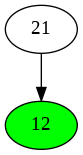


n =  3
P( 3 ) =  3


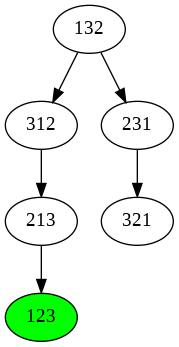


n =  4
P( 4 ) =  4


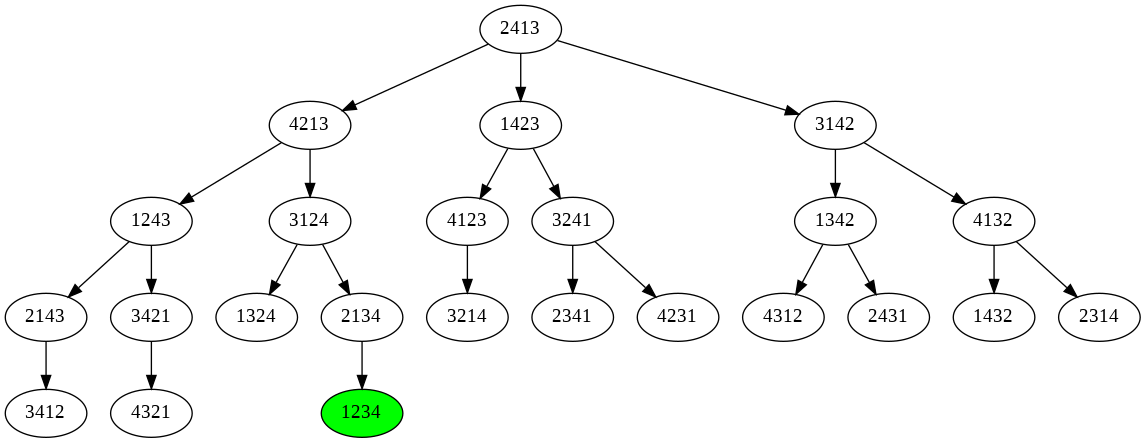

In [ ]:
for i in range(2,5):
  print("\nn = ", i)
  p_i , sol = calcular_P(i)
  print("P(",i,") = ",p_i)
  display(sol)

2. Modify the PancakesTrees.ipynb code leaving only the necessary code and data structures required to calculate the Pn and run the code for at least one night (8 hours) starting with n=5. What is the largest Pn calculated? (Save the results in drive to avoid losing them)

In [26]:
def simpleBFS(s): 
        # Create dictionaries graph,visited
        graph = defaultdict()
        visited = defaultdict()
        ordenado = sorted(s)
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append((s,0)) 
        visited[lstr(s)] = True
  
        while queue: 
            # Dequeue a vertex from queue 
            s , l = queue.pop(0) 
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != ordenado):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if d == ordenado:
                    return l+1
                  else:
                    queue.append((d,l+1)) 
                    visited[lstr(d)] = True
            else:
                return l 

In [27]:
def simpleP(n):
  worst_case = 0
  permutaciones = iter(permutations(list(range(1,n+1))))
  for permutacion in permutaciones:
    p_n = simpleBFS(list(permutacion))
    if p_n > worst_case:
      worst_case = p_n
  return worst_case

In [ ]:
for n in range(5,11):
  print("P("+str(n)+") = "+str(simpleP(n)))

P(5) = 5
P(6) = 7
P(7) = 8


3. Modify the PancakesTrees.ipynb code to plot the pancakes trees using two spatulas.

In [ ]:
def doubleSpatulaBFS(s): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        ordenado = sorted(s)
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append((s,0)) 
        visited[lstr(s)] = True
  
        while queue: 
            # Dequeue a vertex from queue 
            s , l = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != ordenado):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                  d = s[i::-1] + s[i+1:j+1][::-1] + s[j+1:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if (d != ordenado):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append((d,l+1)) 
                    visited[lstr(d)] = True
                    if d == ordenado:
                      # Dsplay the pydot graph G
                      im = Image(G.create_png())
                      display(im)
                      return l+1 , im

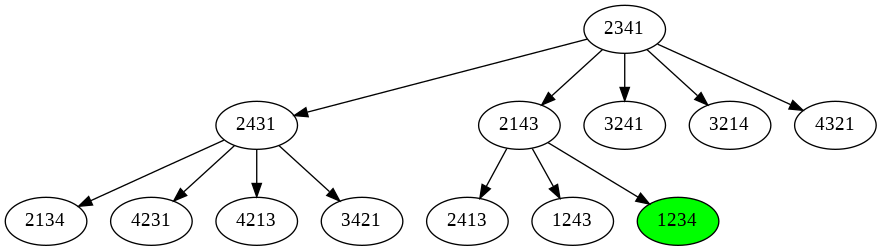

(2, <IPython.core.display.Image object>)


In [ ]:
A = [2,3,4,1]
print(doubleSpatulaBFS(A))

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


